In [1]:
!pip install librosa


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import librosa
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Descargar la canción
!wget -O cancion.mp3 https://somesite.com/cancion.mp3

--2023-02-23 03:04:36--  https://somesite.com/cancion.mp3
Resolving somesite.com (somesite.com)... 45.56.79.23, 72.14.178.174, 198.58.118.167, ...
Connecting to somesite.com (somesite.com)|45.56.79.23|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: http://somesite.com/cancion.mp3 [following]
--2023-02-23 03:04:37--  http://somesite.com/cancion.mp3
Connecting to somesite.com (somesite.com)|45.56.79.23|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 106 [application/octet-stream]
Saving to: ‘cancion.mp3’

cancion.mp3         100%[===================>]     106  --.-KB/s    in 0s      

2023-02-23 03:04:37 (21.4 MB/s) - ‘cancion.mp3’ saved [106/106]



In [4]:
# Cargar la canción
audio_file = "/content/a.mp3"
y, sr = librosa.load(audio_file)



In [6]:
# Obtener los coeficientes de frecuencia utilizando la transformada de Fourier
stft = librosa.stft(y)
spectrogram = np.abs(stft)

# Reducir la dimensionalidad utilizando PCA
pca = PCA(n_components=100)
spectrogram_pca = pca.fit_transform(spectrogram)

# Normalizar los datos
spectrogram_norm = (spectrogram_pca - np.mean(spectrogram_pca)) / np.std(spectrogram_pca)


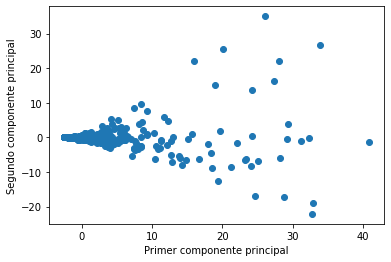

In [8]:
# Visualizar los primeros dos componentes del vector resultante después de aplicar PCA
plt.scatter(spectrogram_norm[:, 0], spectrogram_norm[:, 1])
plt.xlabel('Primer componente principal')
plt.ylabel('Segundo componente principal')
plt.show()

In [ ]:

# El vector resultante puede ser utilizado para entrenar una neurona
neurona.fit(spectrogram_norm, etiqueta)

In [1]:
import librosa
import numpy as np
import hashlib
import librosa
from scipy.signal import find_peaks



In [3]:
# Cargar la canción
audio_file = "/content/a.mp3"
y, sr = librosa.load(audio_file)

# Configuración del algoritmo
NFFT = 2048   # Tamaño de la ventana de Fourier
HOP = 1024    # Salto de la ventana de Fourier
FS = sr       # Frecuencia de muestreo
HASHBITS = 20 # Número de bits para la huella digital

# Obtener los espectrogramas de la señal de audio
stft = librosa.stft(y, n_fft=NFFT, hop_length=HOP)
spectrogram = np.abs(stft)**2

# Aplicar una transformación logarítmica al espectrograma para convertirlo en una escala de decibelios
log_spectrogram = librosa.power_to_db(spectrogram)

# Calcular los picos en el espectrograma utilizando la función find_peaks() de scipy
peaks, _ = find_peaks(log_spectrogram.reshape(-1), height=0)

# Redimensionar los picos a su forma original
time_indices = peaks % log_spectrogram.shape[1]
freq_indices = peaks // log_spectrogram.shape[1]
peaks = librosa.fft_frequencies(sr=sr, n_fft=NFFT)[freq_indices]

# Generar las huellas digitales a partir de los picos y calcular un hash único para cada huella digital
hashes = []
# Crear un archivo para guardar las huellas digitales
f = open('hashes.txt', 'w')
print(len(peaks))

#331 967
#for i in range(len(peaks)):
'''
for i in range(500):
    for j in range(i+1, len(peaks)):
        freq_i = peaks[i]
        freq_j = peaks[j]
        time_delta = time_indices[j] - time_indices[i]
        hash = hashlib.sha1(f"{freq_i}:{freq_j}:{time_delta}".encode("utf-8")).hexdigest()[:HASHBITS//4]
        hashes.append(hash)

# Imprimir las huellas digitales generadas
print(hashes)
'''


# Generar las huellas digitales a partir de los picos y calcular un hash único para cada huella digital
for i in range(1):
    for j in range(i+1, len(peaks)):
        freq_i = peaks[i]
        freq_j = peaks[j]
        time_delta = time_indices[j] - time_indices[i]
        hash = hashlib.sha1(f"{freq_i}:{freq_j}:{time_delta}".encode("utf-8")).hexdigest()[:HASHBITS//4]
        f.write(hash + '\n')

# Cerrar el archivo
f.close()



331967
